In [97]:
import pandas as pd
df = pd.read_csv('fct_invoice.csv')
df1 = pd.read_json('dim_customer.json')

In [98]:
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [99]:
df1

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [100]:
#easy - How many unique customers are in the dataset?
no_of_customers = df['customer_id'].nunique()
no_of_customers

5191

In [101]:
#easy - What are the different categories of products available? How many unique categories are there?
categories = df['category'].unique()
categories

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [102]:
#easy - Which payment method is the most popular? How many times was it used?
no_categories = df['category'].nunique()
no_categories

8

In [103]:
#making a new column for sales
df['new_sales'] = df['quantity'] * df['price']
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,new_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [104]:
#medium - What are the three most popular categories, by total sales?
pop_categories_sales = df.groupby('category')['new_sales'].sum()
sorted_categories = pop_categories_sales.sort_values(ascending=False)
top_categories = sorted_categories.head(3)
top_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: new_sales, dtype: float64

In [105]:
merged_df = pd.merge(df, df1, left_on='customer_id', right_on='id')
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,new_sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [106]:
#medium - What are the total sales attributed to customers over the age of 45?
sales_45 = merged_df[merged_df['age'] > 45]
total_sales_over_45 = sales_45['new_sales'].sum()
total_sales_over_45

82039768.15

/var/folders/gg/k4_c5j6d76s9jhr6c_tpl1nh0000gn/T/ipykernel_4689/2848357494.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'])


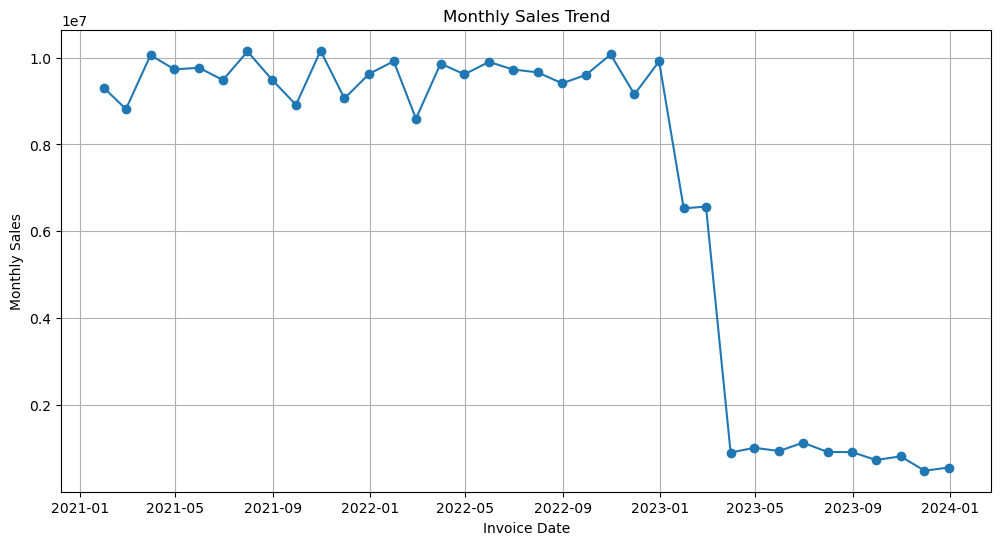

In [107]:
#medium - How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?
import matplotlib.pyplot as plt

merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'])

merged_df.set_index('invoice_date', inplace=True)

monthly_sales = merged_df['new_sales'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.xlabel('Invoice Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()


In [118]:
#hard - Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, 100]  
merged_df['decade_age_range'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)
pivot_table = merged_df.pivot_table(index='category', columns='decade_age_range', values='new_sales', aggfunc='sum', fill_value=0)
pivot_table

decade_age_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,
Books,7923.45,76022.70,87157.95,87885.15,72735.15,81885.75,57706.35,29224.35,0
Clothing,1144505.12,9959955.28,11540776.72,11447451.84,9943150.80,11083154.72,8061649.20,4812382.96,0
Cosmetics,65991.18,583796.28,731310.76,682396.78,563954.20,669832.84,443722.58,274495.66,0
Food & Beverage,9434.92,68633.29,87911.07,91922.48,72132.16,81488.63,58256.97,33879.94,0
Shoes,634379.69,5571978.28,7303468.73,7163028.95,5778436.76,6131336.72,4675324.30,2827400.87,0
Souvenir,6181.71,54438.93,63834.66,68444.55,54966.78,57418.35,38216.34,26662.29,0
Technology,739200.00,5053650.00,6298950.00,6082650.00,4458300.00,5421150.00,3808350.00,2134650.00,0
Toys,35911.68,366392.32,424704.00,408253.44,330516.48,370693.12,293888.00,162856.96,0
